# Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np

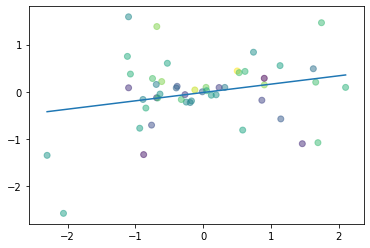

In [2]:
np.random.seed(1)
n=50
x=np.random.randn(n)
y=x*np.random.randn(n)

colors = np.random.randn(n)
plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.scatter(x,y,c=colors,alpha=0.5)
plt.show()

In [3]:
 x_vals = [i for i in range(11)]

In [4]:
x_train = np.array(x_vals,dtype=np.float32).reshape(-1,1)

In [5]:
y_vals = [2*i+1 for i in x_vals]

In [6]:
y_train = np.array(y_vals,dtype=np.float32).reshape(-1,1)

In [7]:
x_train.shape , y_train.shape 

((11, 1), (11, 1))

In [8]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [9]:
class Linear(nn.Module):
    def __init__(self,input_size,output_size):
        super(Linear,self).__init__()
        self.linear = nn.Linear(input_dim,output_dim)
        
    def forward(self,x):
        out = self.linear(x)
        return out

In [10]:
input_dim = 1
output_dim = 1
model = Linear(input_dim,output_dim)

In [11]:
criterion = nn.MSELoss()

In [12]:
lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),lr=lr)

In [13]:
epochs  = 100

In [14]:
for epoch in range(epochs):
    epoch = epoch+1
    
    inputs = Variable(torch.from_numpy(x_train))
    
    labels = Variable(torch.from_numpy(y_train))
    
    # set gradients to zero
    optimizer.zero_grad()
    
    # forward
    outputs = model(inputs)
    
    # loss
    loss = criterion(outputs,labels)
    
    # get gradients (differentiate)
    loss.backward()
    
    # update params
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch,loss.data))

epoch 1, loss 199.45257568359375
epoch 2, loss 180.81492614746094
epoch 3, loss 163.12474060058594
epoch 4, loss 146.3968505859375
epoch 5, loss 130.64332580566406
epoch 6, loss 115.87295532226562
epoch 7, loss 102.0909652709961
epoch 8, loss 89.2987060546875
epoch 9, loss 77.4932632446289
epoch 10, loss 66.66714477539062
epoch 11, loss 56.80807113647461
epoch 12, loss 47.89860534667969
epoch 13, loss 39.91606140136719
epoch 14, loss 32.83233642578125
epoch 15, loss 26.613914489746094
epoch 16, loss 21.221927642822266
epoch 17, loss 16.612361907958984
epoch 18, loss 12.736408233642578
epoch 19, loss 9.540892601013184
epoch 20, loss 6.9689412117004395
epoch 21, loss 4.960719585418701
epoch 22, loss 3.4543211460113525
epoch 23, loss 2.3867437839508057
epoch 24, loss 1.6949710845947266
epoch 25, loss 1.3170521259307861
epoch 26, loss 1.193190574645996
epoch 27, loss 1.2667784690856934
epoch 28, loss 1.4853260517120361
epoch 29, loss 1.8012539148330688
epoch 30, loss 2.1725080013275146
epo

In [15]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 2.290162 ],
       [ 4.108668 ],
       [ 5.9271736],
       [ 7.745679 ],
       [ 9.564184 ],
       [11.38269  ],
       [13.201196 ],
       [15.019702 ],
       [16.838207 ],
       [18.656712 ],
       [20.47522  ]], dtype=float32)

In [16]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

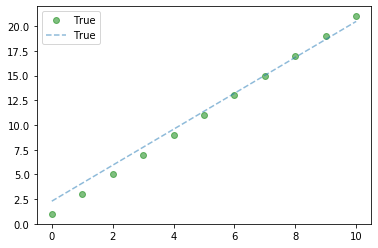

In [17]:
plt.clf()
plt.plot(x_train,y_train,'go',label = "True",alpha = 0.5)

plt.plot(x_train,predicted,'--',label = "True",alpha = 0.5)
plt.legend(loc='best')
plt.show()

In [18]:
#torch.save(model.state_dict(),'# file name')
#torch.load(model.state_dict(),'# file name')